In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
from utils import create_llm, create_workflow
from IPython.display import Image, display
import uuid

PROJECT_ID = "xxxx" # LangDB Project ID

In [90]:
thread_id = str(uuid.uuid4())
run_id = str(uuid.uuid4())
llm_research = create_llm(
    api_base="https://api.us-east-1.langdb.ai",
    project_id=PROJECT_ID,
    model_name="gpt-4o",
    thread_id=thread_id,
    label="research-agent",
    run_id=run_id,
    tags="run=gpt-4o"
)
llm_chart = create_llm(
    api_base="https://api.us-east-1.langdb.ai",
    project_id=PROJECT_ID,
    model_name="gpt-4o",
    thread_id=thread_id,
    label="chart-agent",
    run_id=run_id,
    tags="run=gpt-4o"
)

In [91]:
workflow1 = create_workflow(llm_research, llm_chart)

In [92]:

thread_id = str(uuid.uuid4())
run_id = str(uuid.uuid4())
llm_research = create_llm(
    api_base="https://api.us-east-1.langdb.ai",
    project_id=PROJECT_ID,
    model_name="gemini-1.5-pro-latest",
    thread_id=thread_id,
    label="research-agent",
    run_id=run_id,
    tags="run=gemini"
)
llm_chart = create_llm(
    api_base="https://api.us-east-1.langdb.ai",
    project_id=PROJECT_ID,
    model_name="gemini-1.5-pro-latest",
    thread_id=thread_id,
    label="chart-agent",
    run_id=run_id,
    tags="run=gemini"
)

In [93]:
workflow2 = create_workflow(llm_research, llm_chart)

In [94]:

thread_id = str(uuid.uuid4())
run_id = str(uuid.uuid4())
llm_research = create_llm(
    api_base="https://api.us-east-1.langdb.ai",
    project_id=PROJECT_ID,
    model_name="gemini-1.5-pro-latest",
    thread_id=thread_id,
    label="research-agent",
    run_id=run_id,
    tags="run=combined"
)
llm_chart = create_llm(
    api_base="https://api.us-east-1.langdb.ai",
    project_id=PROJECT_ID,
    model_name="gpt-4o",
    thread_id=thread_id,
    label="chart-agent",
    run_id=run_id,
    tags="run=combined"
)

In [95]:
workflow3 = create_workflow(llm_research, llm_chart)

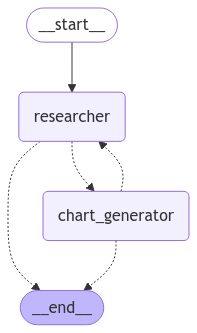

In [33]:
try:
    display(Image(workflow1.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

{'researcher': {'messages': [HumanMessage(content="First, get the UK's GDP over the 2015-2020, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='bfff4b83-fc1c-4ed8-af37-e2d42d48b53e'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pJipww8HR8dOulQ9N520Yco6', 'function': {'arguments': '{"query":"UK GDP 2015-2020"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 210, 'total_tokens': 236, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'cost': 0.0009419999999999999}, 'model_name': 'gpt-4o', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f76d1fb0-5e00-4157-8ed6-4d872a980bd6-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'UK GDP 2015-2020'}, 'id': 'call_pJipww8HR8dOulQ9N520Yco6', 'type': 'tool_call'}], usage_metadata=

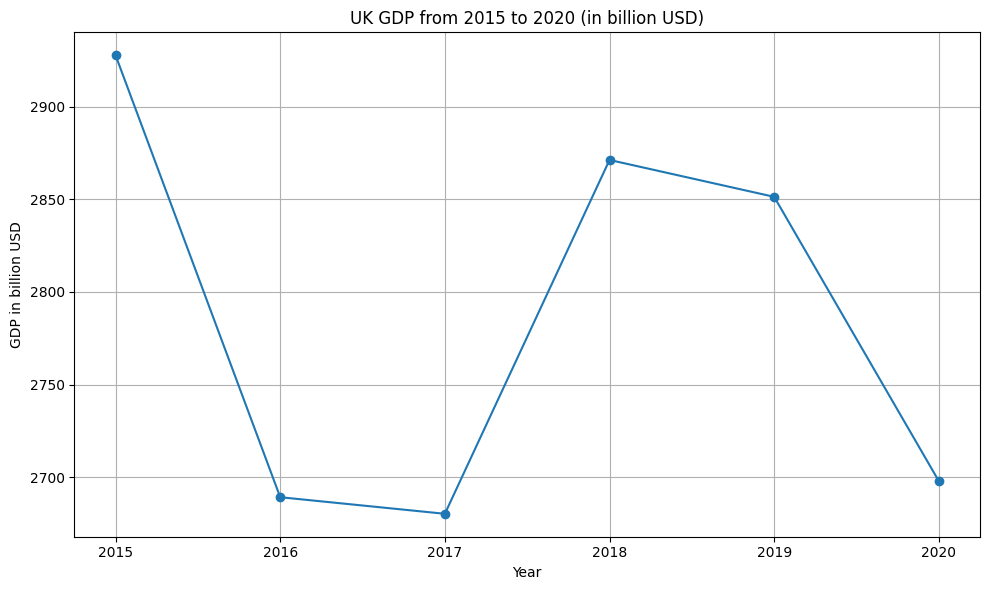

{'chart_generator': {'messages': [HumanMessage(content="First, get the UK's GDP over the 2015-2020, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='bfff4b83-fc1c-4ed8-af37-e2d42d48b53e'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pJipww8HR8dOulQ9N520Yco6', 'function': {'arguments': '{"query":"UK GDP 2015-2020"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 210, 'total_tokens': 236, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'cost': 0.0009419999999999999}, 'model_name': 'gpt-4o', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f76d1fb0-5e00-4157-8ed6-4d872a980bd6-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'UK GDP 2015-2020'}, 'id': 'call_pJipww8HR8dOulQ9N520Yco6', 'type': 'tool_call'}], usage_meta

In [82]:
events = workflow1.stream(
    {
        "messages": [
            (
                "user",
                "First, get the UK's GDP over the 2015-2020, then make a line chart of it. "
                "Once you make the chart, finish.",
            )
        ],
    },
    {"recursion_limit": 150},
)

for s in events:
    print(s)
    print("----")

{'researcher': {'messages': [HumanMessage(content="First, get the UK's GDP over the 2015-2020, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='db17b12c-615e-487d-8d3f-e9ab92fe8cf9'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tavily_search_results_json', 'function': {'arguments': '{"query":"UK GDP 2015-2020"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 214, 'total_tokens': 235, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'cost': 0.0008939999999999999}, 'model_name': 'gemini-1.5-pro-latest', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4b6c6b15-4be0-4f89-a21d-fd2907780c36-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'UK GDP 2015-2020'}, 'id': 'tavily_search_results_json', 'type': 'tool_call'}], usage_

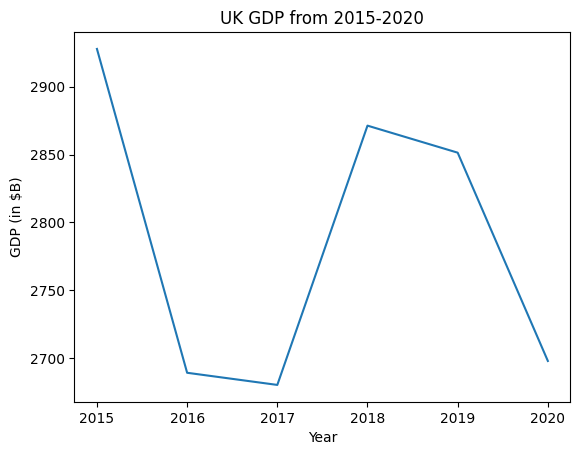

{'chart_generator': {'messages': [HumanMessage(content="First, get the UK's GDP over the 2015-2020, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='db17b12c-615e-487d-8d3f-e9ab92fe8cf9'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tavily_search_results_json', 'function': {'arguments': '{"query":"UK GDP 2015-2020"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 214, 'total_tokens': 235, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'cost': 0.0008939999999999999}, 'model_name': 'gemini-1.5-pro-latest', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4b6c6b15-4be0-4f89-a21d-fd2907780c36-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'UK GDP 2015-2020'}, 'id': 'tavily_search_results_json', 'type': 'tool_call'}], u

In [79]:
events = workflow2.stream(
    {
        "messages": [
            (
                "user",
                "First, get the UK's GDP over the 2015-2020, then make a line chart of it. "
                "Once you make the chart, finish.",
            )
        ],
    },
    {"recursion_limit": 150},
)

for s in events:
    print(s)
    print("----")

{'researcher': {'messages': [HumanMessage(content="First, get the UK's GDP over the 2015-2020, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='a5d0691c-d3e7-40da-b740-fbcb81a903ec'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tavily_search_results_json', 'function': {'arguments': '{"query":"UK GDP 2015-2020"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 214, 'total_tokens': 235, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'cost': 0.0008939999999999999}, 'model_name': 'gemini-1.5-pro-latest', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-97d07baa-eb42-4022-8267-56e67a6e8b49-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'UK GDP 2015-2020'}, 'id': 'tavily_search_results_json', 'type': 'tool_call'}], usage_

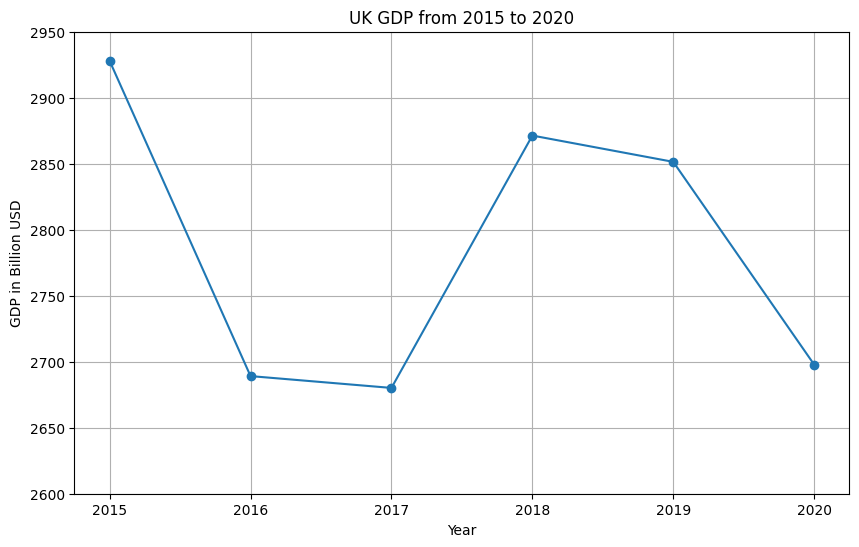

{'chart_generator': {'messages': [HumanMessage(content="First, get the UK's GDP over the 2015-2020, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='a5d0691c-d3e7-40da-b740-fbcb81a903ec'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tavily_search_results_json', 'function': {'arguments': '{"query":"UK GDP 2015-2020"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 214, 'total_tokens': 235, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'cost': 0.0008939999999999999}, 'model_name': 'gemini-1.5-pro-latest', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-97d07baa-eb42-4022-8267-56e67a6e8b49-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'UK GDP 2015-2020'}, 'id': 'tavily_search_results_json', 'type': 'tool_call'}], u

In [88]:
events = workflow3.stream(
    {
        "messages": [
            (
                "user",
                "First, get the UK's GDP over the 2015-2020, then make a line chart of it. "
                "Once you make the chart, finish.",
            )
        ],
    },
    {"recursion_limit": 150},
)

for s in events:
    print(s)
    print("----")

## Tracing 

Here is the trace of Combined Workflow:

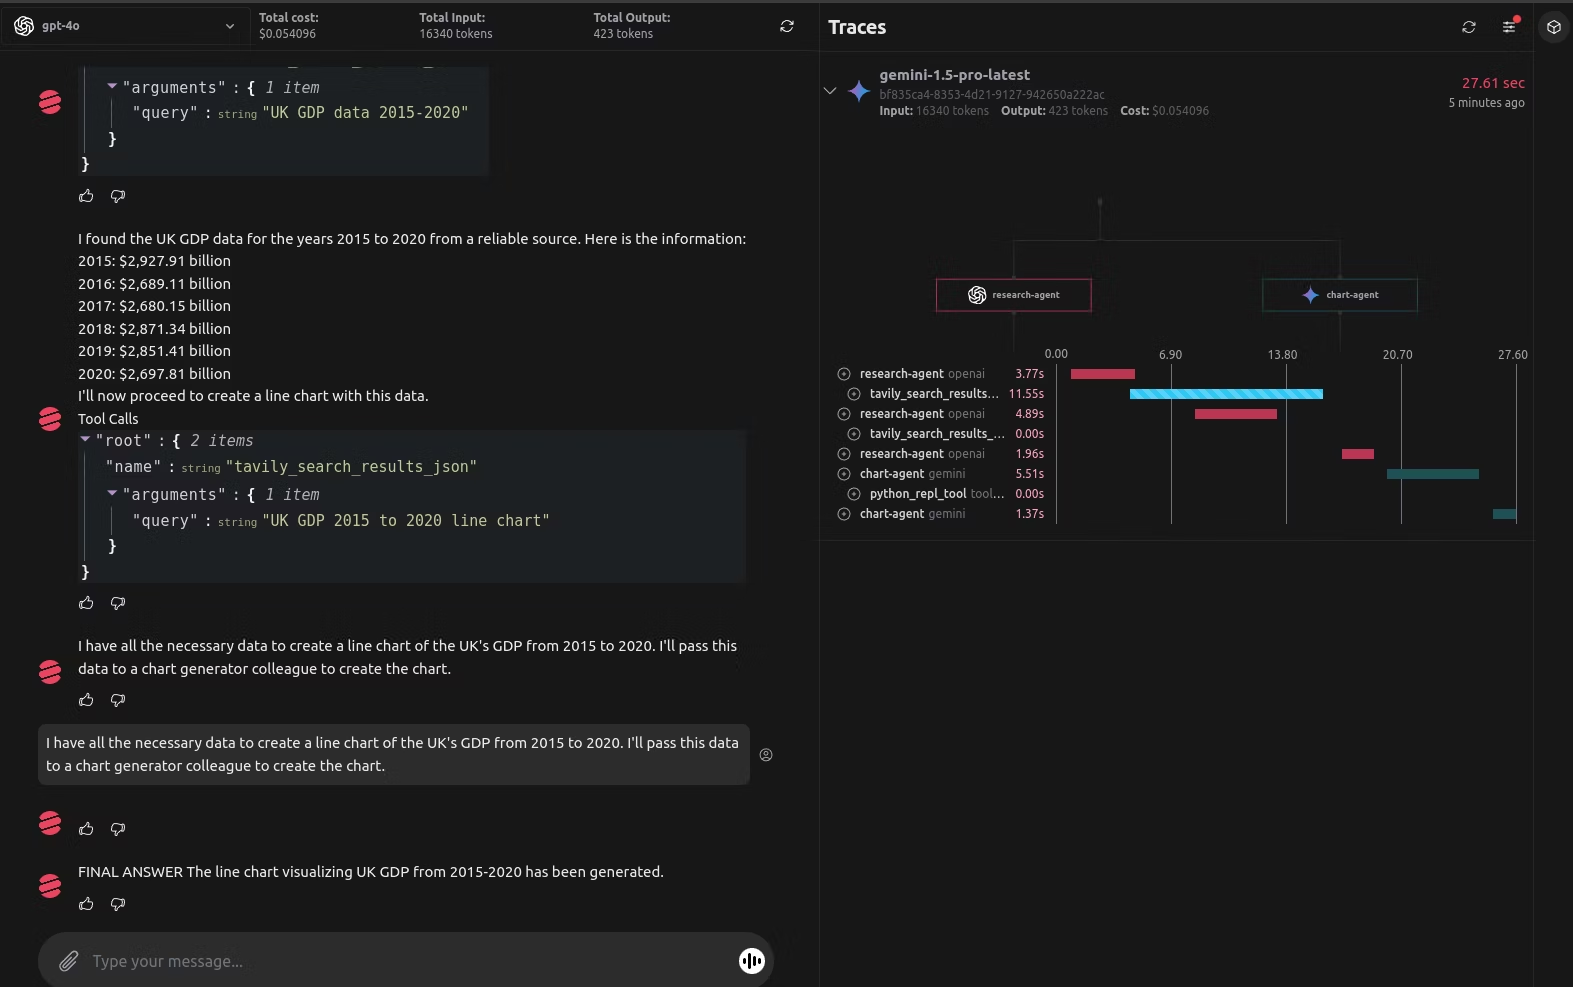

### Analytics

We will compare the performance of the workflows using the analytics API.

The table below shows the performance metrics of various workflows. Key metrics include:

- `total_cost`: Total cost of running the workflows.
- `avg_duration`: Average duration per request (in milliseconds).
- `total_input_tokens` and `total_output_tokens`: Token counts.
- `avg_ttft`: Average time to first token.  
- `tps` (tokens per second) and `tpot` (Time per output token).

In [56]:
from utils import get_analytics, get_analytics_dataframe

In [135]:
analytics_df =get_analytics_dataframe(PROJECT_ID, "run")

In [136]:
analytics_df


,tag_tuple,total_cost,total_requests,avg_duration,total_duration,total_input_tokens,total_output_tokens,avg_ttft,tps,tpot
1,[gemini],0.037731,4,2390.0,9559.802,11197,345,2390.0,1207.35,0.03
2,[gpt-4o],0.057021,4,4574.9,18299.686,17235,443,4574.9,966.03,0.04
3,[combined],0.034887,4,2765.5,11061.997,10009,405,2765.5,941.42,0.03


## Observations

1. **Cost Analysis**: Workflow `gemini` has the lowest cost, while `gpt-4o` is the most expensive.
2. **Efficiency**: `combined` provides the best balance of cost and duration.


<Figure size 1000x600 with 0 Axes>

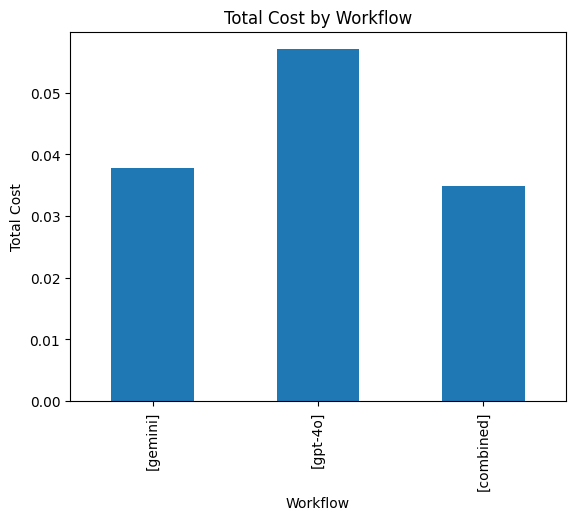

<Figure size 1000x600 with 0 Axes>

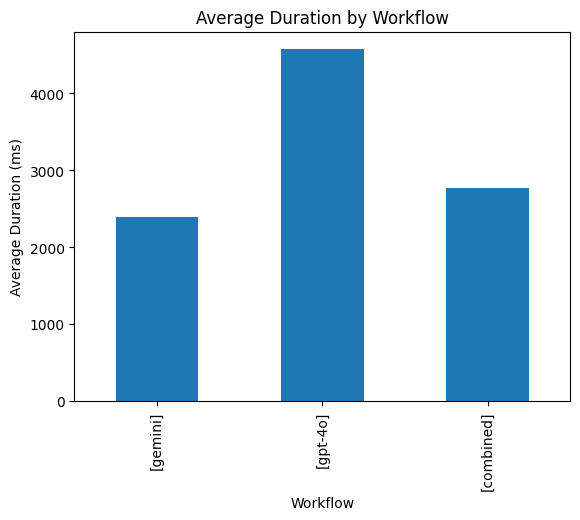

In [140]:
import matplotlib.pyplot as plt

# Bar chart for total costs
plt.figure(figsize=(10, 6))
analytics_df.plot(kind='bar', x='tag_tuple', y='total_cost', legend=False)
plt.title('Total Cost by Workflow')
plt.ylabel('Total Cost')
plt.xlabel('Workflow')
plt.show()

# Bar chart for average duration
plt.figure(figsize=(10, 6))
analytics_df.plot(kind='bar', x='tag_tuple', y='avg_duration', legend=False)
plt.title('Average Duration by Workflow')
plt.ylabel('Average Duration (ms)')
plt.xlabel('Workflow')
plt.show()